In [2]:
import os
os.listdir("/home/padman/Desktop/Shyam/")

['language_predictions.csv',
 'newJugad.ipynb',
 'language-classification-with-87-acc.ipynb',
 'archive.zip',
 'SavedModels',
 'indian-langauge-detection.ipynb',
 'model.tflite',
 'Language Detection Dataset',
 'audio',
 'wisper.ipynb',
 'archive',
 'small_set',
 'best_model.h5',
 'mfcc_scaler.save',
 'new_code.ipynb',
 're.ipynb',
 'language_identification_model.h5']

In [3]:

dir_name =os.path.join("/home/padman/Desktop/Shyam/" ,"Language Detection Dataset" )
os.listdir(dir_name)

['Kannada',
 'Marathi',
 'Punjabi',
 'Telugu',
 'Gujarati',
 'Malayalam',
 'Urdu',
 'Tamil',
 'Hindi',
 'Bengali']

In [4]:
for dirname , _ , files in os.walk(dir_name):
    print(f"{dirname} ,FOLDERS-> {len(_)} , FILES->{len(files)} ")

/home/padman/Desktop/Shyam/Language Detection Dataset ,FOLDERS-> 10 , FILES->0 
/home/padman/Desktop/Shyam/Language Detection Dataset/Kannada ,FOLDERS-> 0 , FILES->22208 
/home/padman/Desktop/Shyam/Language Detection Dataset/Marathi ,FOLDERS-> 0 , FILES->25379 
/home/padman/Desktop/Shyam/Language Detection Dataset/Punjabi ,FOLDERS-> 0 , FILES->26229 
/home/padman/Desktop/Shyam/Language Detection Dataset/Telugu ,FOLDERS-> 0 , FILES->23656 
/home/padman/Desktop/Shyam/Language Detection Dataset/Gujarati ,FOLDERS-> 0 , FILES->26441 
/home/padman/Desktop/Shyam/Language Detection Dataset/Malayalam ,FOLDERS-> 0 , FILES->24044 
/home/padman/Desktop/Shyam/Language Detection Dataset/Urdu ,FOLDERS-> 0 , FILES->31960 
/home/padman/Desktop/Shyam/Language Detection Dataset/Tamil ,FOLDERS-> 0 , FILES->24196 
/home/padman/Desktop/Shyam/Language Detection Dataset/Hindi ,FOLDERS-> 0 , FILES->25462 
/home/padman/Desktop/Shyam/Language Detection Dataset/Bengali ,FOLDERS-> 0 , FILES->27258 


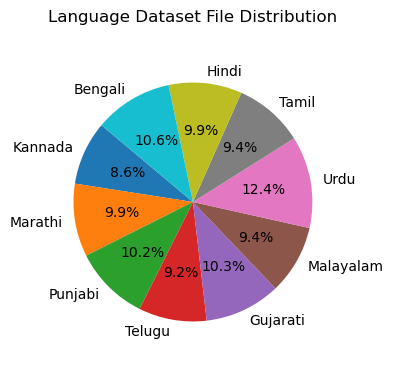

In [5]:
import matplotlib.pyplot as plt


kannada_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Kannada"
marathi_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Marathi"
punjabi_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Punjabi"
telugu_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Telugu"
gujarati_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Gujarati"
malayalam_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Malayalam"
urdu_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Urdu"
tamil_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Tamil"
hindi_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Hindi"
bengali_path = "/home/padman/Desktop/Shyam/Language Detection Dataset/Bengali"


file_counts = {
    "Kannada": 22208,
    "Marathi": 25379,
    "Punjabi": 26229,
    "Telugu": 23656,
    "Gujarati": 26441,
    "Malayalam": 24044,
    "Urdu": 31960,
    "Tamil": 24196,
    "Hindi": 25462,
    "Bengali": 27258
}

# Pie chart
labels = file_counts.keys()
sizes = file_counts.values()

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Language Dataset File Distribution")
plt.axis('equal')  
plt.tight_layout()
plt.show()


In [6]:
import os
import numpy as np
from IPython.display import Audio


for folders in os.listdir(dir_name):
    folder_path = os.path.join(dir_name, folders)
    files = os.listdir(folder_path)
    idx = np.random.randint(len(files))
    audio_file = files[idx]
    audio_path = os.path.join(folder_path, audio_file)
    print(audio_path)
    display(Audio(filename=audio_path))


/home/padman/Desktop/Shyam/Language Detection Dataset/Kannada/7411.mp3


/home/padman/Desktop/Shyam/Language Detection Dataset/Marathi/11405.mp3


/home/padman/Desktop/Shyam/Language Detection Dataset/Punjabi/11383.mp3


/home/padman/Desktop/Shyam/Language Detection Dataset/Telugu/2792.mp3


/home/padman/Desktop/Shyam/Language Detection Dataset/Gujarati/10106.mp3


/home/padman/Desktop/Shyam/Language Detection Dataset/Malayalam/22170.mp3


/home/padman/Desktop/Shyam/Language Detection Dataset/Urdu/14985.mp3


/home/padman/Desktop/Shyam/Language Detection Dataset/Tamil/9826.mp3


/home/padman/Desktop/Shyam/Language Detection Dataset/Hindi/6187.mp3


/home/padman/Desktop/Shyam/Language Detection Dataset/Bengali/15206.mp3


In [7]:
import os
import librosa
import numpy as np
import csv


file_counts = {
    "Kannada": 0,
    "Marathi": 1,
    "Punjabi": 2,
    "Telugu": 3,
    "Gujarati": 4,
    "Malayalam": 5,
    "Urdu": 6,
    "Tamil": 7,
    "Hindi": 8,
    "Bengali": 9
}

output_csv = "/home/padman/Desktop/Shyam copy/label/ground_truth.csv"

data_rows = []

for folder in os.listdir(dir_name):
    folder_path = os.path.join(dir_name, folder)
    for file in os.listdir(folder_path):
        if file.endswith(".mp3"):
            audio_path = os.path.join(folder_path, file)
            data_rows.append((audio_path, file_counts[folder]))

with open(output_csv, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["file_path", "language_code"])
    writer.writerows(data_rows)

print(f"CSV written to: {output_csv}")


CSV written to: /home/padman/Desktop/Shyam copy/label/ground_truth.csv


In [8]:
import pandas as pd

df = pd.read_csv('/home/padman/Desktop/Shyam copy/label/ground_truth.csv')

label_counts = df['language_code'].value_counts().sort_index()
print(label_counts)



language_code
0    22208
1    25379
2    26229
3    23656
4    26441
5    24044
6    31960
7    24196
8    25462
9    27258
Name: count, dtype: int64


In [9]:
import os
import torch
import torchaudio
import pandas as pd
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2ForSequenceClassification
from tqdm import tqdm
import os
import pandas as pd
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader
from transformers import (
    Wav2Vec2ForSequenceClassification,
    Wav2Vec2FeatureExtractor,
    Trainer,
    TrainingArguments
)



2025-05-03 15:43:42.723141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746267222.737379 2598769 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746267222.741788 2598769 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746267222.754838 2598769 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746267222.754848 2598769 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746267222.754850 2598769 computation_placer.cc:177] computation placer alr

In [10]:
!pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable


In [23]:
from transformers import WhisperProcessor
import torchaudio
import torch
from torch.utils.data import Dataset

class LanguageIDDataset(Dataset):
    def __init__(self, df, processor, target_len_sec=5):
        self.df = df.reset_index(drop=True)
        self.processor = processor
        self.target_len = int(16000 * target_len_sec)  # Whisper uses 16kHz sampling rate

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        try:
            row = self.df.iloc[idx]
            audio_path = row["file_path"]
            label = row["language_code"]

            waveform, sr = torchaudio.load(audio_path)
            waveform = waveform.mean(dim=0)  # Convert to mono

            if sr != 16000:
                resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=16000)
                waveform = resampler(waveform)

            # Pad or truncate to the target length
            if waveform.shape[0] < self.target_len:
                pad_len = self.target_len - waveform.shape[0]
                waveform = torch.nn.functional.pad(waveform, (0, pad_len))
            else:
                waveform = waveform[:self.target_len]

            # Convert waveform to numpy array for the processor
            waveform = waveform.numpy()

            # Process the audio to get log-Mel spectrogram
            inputs = self.processor(
                waveform,
                sampling_rate=16000,
                return_tensors="pt"
            )

            input_features = inputs["input_features"].squeeze(0)  # Shape: (80, time_steps)
            return input_features, torch.tensor(label, dtype=torch.long)

        except Exception as e:
            print(f"[Dataset] Skipping audio {audio_path} due to error: {e}")
            return None


In [24]:
from transformers import WhisperProcessor, WhisperModel

# Load the processor and model
processor = WhisperProcessor.from_pretrained("openai/whisper-small")
base_model = WhisperModel.from_pretrained("openai/whisper-small")


In [25]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, random_split
from transformers import Wav2Vec2FeatureExtractor


# Shuffle and split (80:10:10)
from sklearn.model_selection import train_test_split
import pandas as pd

# Load CSV
df = pd.read_csv("/home/padman/Desktop/Shyam copy/label/ground_truth.csv")  # Update with your actual path

# First split: 80% train, 20% temp (val + test)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# Second split: 50% of temp_df goes to val, 50% to test → results in 10% each
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, shuffle=True)




train_dataset = LanguageIDDataset(train_df, processor)
val_dataset = LanguageIDDataset(val_df, processor)
test_dataset = LanguageIDDataset(test_df, processor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Visualize one batch
for batch in train_loader:
    input_values, labels = batch
    print("Input shape:", input_values.shape)  # (batch_size, sequence_length)
    print("Labels:", labels)
    break


Input shape: torch.Size([16, 80, 3000])
Labels: tensor([2, 7, 1, 2, 0, 6, 8, 6, 3, 7, 3, 6, 2, 9, 3, 6])


In [26]:
len(train_loader)

12842

In [27]:
print(len(val_loader),len(test_loader))

1606 1606


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import HubertModel
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import gc

# Create result directory
os.makedirs("results_fine_tune_whisper", exist_ok=True)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

from transformers import WhisperModel

class WhisperClassifier(nn.Module):
    def __init__(self, base_model, num_labels):
        super(WhisperClassifier, self).__init__()
        self.encoder = base_model.encoder  # use only encoder
        self.hidden_size = base_model.config.d_model  # typically 1024
        self.classifier = nn.Sequential(
            nn.Linear(self.hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_labels)
        )

    def forward(self, input_features):
        encoder_outputs = self.encoder(input_features=input_features)
        pooled_output = encoder_outputs.last_hidden_state.mean(dim=1)
        logits = self.classifier(pooled_output)
        return logits


# Load base model and classifier
num_classes = df['language_code'].nunique()
model = WhisperClassifier(base_model, num_labels=num_classes).to(device)

criterion = nn.CrossEntropyLoss()

# ------------------ Phase 1: Feature Extraction ------------------ #
feature_extract_epochs = 10
for param in model.encoder.parameters():
    param.requires_grad = False

optimizer = optim.Adam(model.classifier.parameters(), lr=1e-3)

phase1_train_losses, phase1_train_accuracies = [], []

for epoch in range(feature_extract_epochs):
    model.train()
    total_loss = 0
    all_preds, all_labels = [], []

    for bcnt, batch in enumerate(train_loader):
        if bcnt >= 100: break
        try:
            input_values, labels = batch
            input_values, labels = input_values.to(device), labels.to(device)
        except Exception as e:
            print(f"[Feature Extract] Skipping batch {bcnt}: {e}")
            continue

        optimizer.zero_grad()
        outputs = model(input_values)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        del input_values, labels, outputs, loss, preds
        torch.cuda.empty_cache()
        gc.collect()

    acc = accuracy_score(all_labels, all_preds)
    phase1_train_losses.append(total_loss)
    phase1_train_accuracies.append(acc)

    print(f"[Feature Extract] Epoch {epoch+1}/{feature_extract_epochs} - Loss: {total_loss:.4f}, Acc: {acc*100:.2f}%")

# Save Phase 1 log
with open("results_fine_tune_whisper/feature_train_log.txt", "w") as f:
    for e, (l, a) in enumerate(zip(phase1_train_losses, phase1_train_accuracies), 1):
        f.write(f"Epoch {e}: Loss={l:.4f}, Accuracy={a*100:.2f}%\n")

# ------------------ Phase 2: Fine Tuning ------------------ #
fine_tune_epochs = 7

for param in model.encoder.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model.parameters(), lr=1e-4)

phase2_train_losses, phase2_train_accuracies = [], []
phase2_val_losses, phase2_val_accuracies = [], []

for epoch in range(fine_tune_epochs):
    model.train()
    total_loss = 0
    all_preds, all_labels = [], []

    for bcnt, batch in enumerate(train_loader):
        if bcnt >= 200: break
        try:
            input_values, labels = batch
            input_values, labels = input_values.to(device), labels.to(device)
        except Exception as e:
            print(f"[Fine-tune] Skipping batch {bcnt}: {e}")
            continue

        optimizer.zero_grad()
        outputs = model(input_values)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        del input_values, labels, outputs, loss, preds
        torch.cuda.empty_cache()
        gc.collect()

    train_acc = accuracy_score(all_labels, all_preds)
    phase2_train_losses.append(total_loss)
    phase2_train_accuracies.append(train_acc)

    print(f"[Fine-tune] Epoch {epoch+1}/{fine_tune_epochs} - Loss: {total_loss:.4f}, Acc: {train_acc*100:.2f}%")

    # -------- Validation --------
    model.eval()
    val_loss = 0
    val_preds, val_labels = [], []

    with torch.no_grad():
        for vcnt, batch in enumerate(val_loader):
            if vcnt >= 200: break
            try:
                input_values, labels = batch
                input_values, labels = input_values.to(device), labels.to(device)
            except Exception as e:
                print(f"[Validation] Skipping batch {vcnt}: {e}")
                continue

            outputs = model(input_values)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

            del input_values, labels, outputs, loss, preds
            torch.cuda.empty_cache()
            gc.collect()

    val_acc = accuracy_score(val_labels, val_preds)
    phase2_val_losses.append(val_loss)
    phase2_val_accuracies.append(val_acc)

    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%")

    if (epoch+1) in [5, 10, 11, 12, 14, 16]:
        torch.save(model.state_dict(), "results_fine_tune_whisper/hubert.pt")
        print(f"Model saved at epoch {epoch+1}")

# Save Phase 2 logs
with open("results_fine_tune_whisper/fine_tune_train_log.txt", "w") as f:
    for e, (l, a) in enumerate(zip(phase2_train_losses, phase2_train_accuracies), 1):
        f.write(f"Epoch {e}: Loss={l:.4f}, Accuracy={a*100:.2f}%\n")

with open("results_fine_tune_whisper/fine_tune_val_log.txt", "w") as f:
    for e, (l, a) in enumerate(zip(phase2_val_losses, phase2_val_accuracies), 1):
        f.write(f"Epoch {e}: Val Loss={l:.4f}, Val Accuracy={a*100:.2f}%\n")

# ------------------ Plotting ------------------ #
# Phase 1 plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, feature_extract_epochs + 1), phase1_train_losses, color='blue')
plt.title("Phase 1: Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, feature_extract_epochs + 1), [a * 100 for a in phase1_train_accuracies], color='green')
plt.title("Phase 1: Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)

plt.tight_layout()
plt.savefig("results_fine_tune_whisper/phase1_training_curves.png")
plt.close()

# Phase 2 plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, fine_tune_epochs + 1), phase2_train_losses, label="Train Loss", color='blue')
plt.plot(range(1, fine_tune_epochs + 1), phase2_val_losses, label="Val Loss", color='orange')
plt.title("Phase 2: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, fine_tune_epochs + 1), [a * 100 for a in phase2_train_accuracies], label="Train Acc", color='green')
plt.plot(range(1, fine_tune_epochs + 1), [a * 100 for a in phase2_val_accuracies], label="Val Acc", color='red')
plt.title("Phase 2: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("results_fine_tune_whisper/phase2_training_curves.png")
plt.close()

# Combined plot
combined_train_losses = phase1_train_losses + phase2_train_losses
combined_train_accuracies = phase1_train_accuracies + phase2_train_accuracies
combined_val_losses = [None] * len(phase1_train_losses) + phase2_val_losses
combined_val_accuracies = [None] * len(phase1_train_accuracies) + phase2_val_accuracies

epochs = list(range(1, len(combined_train_losses) + 1))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, combined_train_losses, label="Train Loss", color='blue')
plt.plot(epochs[len(phase1_train_losses):], combined_val_losses[len(phase1_train_losses):], label="Val Loss", color='orange')
plt.title("Combined: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, [a * 100 for a in combined_train_accuracies], label="Train Acc", color='green')
plt.plot(epochs[len(phase1_train_accuracies):], [a * 100 for a in combined_val_accuracies[len(phase1_train_accuracies):]], label="Val Acc", color='red')
plt.title("Combined: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("results_fine_tune_whisper/combined_training_curves.png")
plt.close()


Using device: cuda
[Feature Extract] Epoch 1/10 - Loss: 171.8351, Acc: 47.56%
[Feature Extract] Epoch 2/10 - Loss: 95.6387, Acc: 68.56%
[Feature Extract] Epoch 3/10 - Loss: 69.3559, Acc: 76.19%
[Feature Extract] Epoch 4/10 - Loss: 57.6353, Acc: 77.81%
[Feature Extract] Epoch 5/10 - Loss: 50.7025, Acc: 79.38%
[Feature Extract] Epoch 6/10 - Loss: 46.3029, Acc: 83.06%
[Feature Extract] Epoch 7/10 - Loss: 41.8054, Acc: 82.19%
[Feature Extract] Epoch 8/10 - Loss: 37.9882, Acc: 82.81%
[Feature Extract] Epoch 9/10 - Loss: 37.7122, Acc: 83.50%
[Feature Extract] Epoch 10/10 - Loss: 37.3914, Acc: 83.81%
[Fine-tune] Epoch 1/7 - Loss: 104.3730, Acc: 82.12%
Validation Loss: 49.8732, Validation Accuracy: 86.31%
[Fine-tune] Epoch 2/7 - Loss: 57.2960, Acc: 86.22%
Validation Loss: 89.4040, Validation Accuracy: 80.62%


In [ ]:
!nvidia-smi


Sat May  3 14:05:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A5000               Off |   00000000:81:00.0 Off |                  Off |
| 55%   75C    P2            128W /  230W |    7281MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!ps -fp 1959743


UID          PID    PPID  C STIME TTY          TIME CMD
